In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

In [2]:
data = pd.read_excel('../data-set.xlsx', sheet_name='SEWAATM', usecols='A:H', header=6)
data = data.iloc[0:1247]

In [3]:
data['Unnamed: 0'] = data['Unnamed: 0'].astype(int)
data.set_index('Unnamed: 0', inplace=True)
data.index.name = None

In [4]:
col_dict = {'Unnamed: 1':'Tanggal Request',
            'Unnamed: 2':'Nama LOKASI',
            'Unnamed: 3':'KOTA',
            'Unnamed: 4':'MASA SEWA (TAHUN)',
            'Unnamed: 5':'Delivery',
            'Unnamed: 6':'Type',
            'Unnamed: 7':'Jatuh Tempo Tag 3-4th'}
data.rename(columns=col_dict, inplace=True)
data.head()

,Tanggal Request,Nama LOKASI,KOTA,MASA SEWA (TAHUN),Delivery,Type,Jatuh Tempo Tag 3-4th
1,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00
2,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00
3,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00
4,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00
5,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,2010-10-07 00:00:00,529EPP7,2013-10-01 00:00:00


In [5]:
df = data[['Nama LOKASI', 'KOTA']]
col_dict2 = {'Nama LOKASI':'lokasi', 'KOTA':'kota'}
df.rename(columns=col_dict2, inplace=True)

In [6]:
df['lokasi'] = df['lokasi'].str.lower()
df['kota'] = df['kota'].str.lower()

In [7]:
df.head()

,lokasi,kota
1,pln kota,jkt-hub ii rpc
2,perumnas,jkt-hub i rpc
3,tip top depok,jkt-hub viii rpc
4,tip top pdk bambu,jkt-hub vi rpc
5,tip top rawamangun,jkt-hub vii


In [8]:
df['status'] = ''

In [9]:
df['status'][df['kota'].str.contains('rpc')] = 'rpc'
df['status'][df['kota'].str.contains('relok')] = 'relok'
df['status'][df['kota'].str.contains('cancel')] = 'cancel'
df['status'][df['kota'].str.contains('off')] = 'off'
df['status'][df['kota'].str.contains('hold')] = 'hold'

df['status'] = df['status'].replace('', 'aktif')

In [10]:
df['status'].value_counts()

aktif     835
off       171
rpc       156
cancel     43
hold       40
relok       2
Name: status, dtype: int64

In [11]:
df[df['status'].str.contains('hold')].sample(10)

,lokasi,kota,status
409,graha energy (rpc),jkt-hub iii hold,hold
449,capem buah batu (rpc),bandung hold,hold
455,cabang cirebon (rpc),cirebon hold,hold
399,kcp kebon jeruk (rpc),jkt-hub ii hold,hold
859,alfamart lapangan bola 2,jkt-hub ii hold,hold
458,rs. putra bahagia (rpc),cirebon hold,hold
846,alfamart senen raya - sevel cikini,jkt-hub iv-hold,hold
858,alfamart pancoran riverside,jkt-hub i hold,hold
857,alfamart ciputat raya 5,jkt-hub iii hold,hold
848,alfamart pspt tebet - sevel pejaten,jkt-hub i hold,hold


In [12]:
df['kota'] = df['kota'].str.replace(' off', '')
df['kota'] = df['kota'].str.replace(' rpc', '')
df['kota'] = df['kota'].str.replace(' cancel', '')
df['kota'] = df['kota'].str.replace(' hold', '')
df['kota'] = df['kota'].str.replace(' relok', '')

## Jakarta

In [13]:
for i in df['kota']:
    if 'hub' in i:
        df['kota'] = df['kota'].str.replace(i, 'jakarta')
    if 'jakarta' in i:
        x = i[:7]
        df['kota'] = df['kota'].str.replace(i, x)

In [14]:
df[['kota', 'status']][df['kota'].str.contains('jakarta')].sample(10)

,kota,status
1102,jakarta,aktif
959,jakarta,aktif
831,jakarta,aktif
186,jakarta,rpc
1089,jakarta,aktif
923,jakarta,off
904,jakarta,aktif
806,jakarta,aktif
908,jakarta,aktif
329,jakarta,off


## Top 5 kota aktif

In [15]:
df2 = df[['kota', 'status']]

In [16]:
df2['kota'][df2['status'].str.contains('aktif')].value_counts().head()

jakarta       195
surabaya       49
makasar        34
solo           33
yogyakarta     30
Name: kota, dtype: int64

<AxesSubplot:>

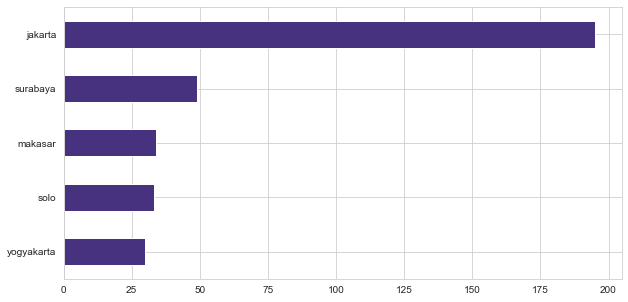

In [17]:
df2['kota'][df2['status'].str.contains('aktif')].value_counts().head().sort_values().plot(kind='barh', figsize=(10, 5))

## Kategori aktif di Jakarta

In [18]:
df3 = df[['lokasi']][(df['kota']=='jakarta') & (df['status']=='aktif')]

In [19]:
df3.sample(10)

,lokasi
419,kk rspad (rpc)
799,rs pondok indah bintaro
1109,kk plaza menteng cikarang
601,alfa mart pulo gebang 4
1077,kk gedung bulog i
602,alfa mart gdc de caspia / alfamart kali mulya
888,capem pluit
1096,kcp billy moon
793,kcp bendungan hilir
876,kk rawamangun


In [20]:
lst_swalayan = []
lst_swalayan_cat = ['toko', 'swalayan', 'tip top', 'carefour', 'indomaret', 'alfa mart', 'alfamart', 'giant', 'super indo']

for i in lst_swalayan_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_swalayan.append(x)
        
len_swalayan = len(list(set(lst_swalayan)))

In [21]:
lst_swalayan

['tip top rawamangun ',
 'tip top ciputat',
 'tip top depok',
 'tip top pondok bambu',
 'atm indomaret kayu putih selatan',
 'atm indomaret jaksa',
 'atm indomaret pramuka',
 'atm indomaret boulevard timur',
 'atm indomaret hybrid sentra puri',
 'atm indomaret srengseng 117',
 'atm indomaret point samanhudi',
 'indomaret gading serpong',
 'alfa mart pasar minggu 2',
 'alfa mart ptb angke  4',
 'alfa mart cideng barat (ceba)',
 'alfa mart utama raya',
 'alfa mart terogong raya',
 'alfa mart kemang utara',
 'alfa mart rc. veteran  2',
 'alfa mart jatiwaringin 2 (jwn2)',
 'alfa mart raya  bogor  km 27',
 'alfa mart pulo gebang 4',
 'alfa mart gdc de caspia / alfamart kali mulya',
 'alfa mart lenteng agung  barat',
 'alfa mart gdc de caspia / alfamart kali mulya',
 'arion plaza / alfamart paus',
 'alfamart bekasi',
 'super indo daan mogot / alok dr market city',
 'super indo citra garden/ kk pln kalideres']

In [22]:
lst_spbu = []
lst_spbu_cat = ['spbu']

for i in lst_spbu_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_spbu.append(x)

len_spbu = len(list(set(lst_spbu)))  

In [23]:
lst_spbu

['spbu kemanggisan',
 'spbu pantai indah kapuk',
 'spbu pluit permai / apartemen gp plaza',
 'spbu joglo',
 'spbu halim',
 'spbu sunter pertamina',
 'spbu pondok terong depok',
 'spbu soebijanto',
 'spbu condet',
 'spbu cilangkap',
 'spbu menteng',
 'spbu pasar minggu',
 'spbu deltamas cikarang / padang golf cikarang',
 'spbu jatinegara / rs mmc',
 'spbu pramuka  ',
 'spbu tanjung barat eks sevel',
 'spbu matraman',
 'spbu cempaka putih',
 'spbu rasuna said',
 'spbu pertamina abdul muis',
 'spbu km 27',
 'spbu coco cikarang',
 'spbu pulogadung',
 'spbu 34-17514 mm2100 cibitung']

In [24]:
lst_kcp = []
lst_kcp_cat = ['kcp']

for i in lst_kcp_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_kcp.append(x)

len_kcp = len(list(set(lst_kcp))) 

In [25]:
lst_kcp

['kcp itc roxy mas (rpc)',
 'kcp s. parman (rpc)',
 'kcp pondok indah 2 (rpc)',
 'kcp melawai (rpc)',
 'kcp gunung sahari (rpc)',
 'kcp mangga dua (rpc)',
 'kcp oil centre thamrin (rpc)',
 'kcp ruko pondok gede (rpc)',
 'kcp cikarang (rpc) - brubah ke hub 9 sjk mr 19',
 'kcp mikro sunter (rpc)',
 'kcp kelapa gading ',
 'kcp pamulang',
 'kcp kelapa gading ii',
 'kcp bendungan hilir',
 'kcp kemang',
 'kcp s parman 2',
 'kcp saharjo',
 'kcp tebet',
 'kcp bakrie tower',
 'kcp plaza abda',
 'kcp kby-baru',
 'kcp radio dalam',
 'kcp pln menteng ii',
 'kcp bintaro jaya',
 'kcp bsd city',
 'kcp billy moon',
 'kcp bekasi barat',
 'kcp cibubur citra grand',
 'kcp niaga kalimas',
 'kcp tj. priok',
 'kcp kb jeruk',
 'kcp mampang']

In [26]:
lst_mall = []
lst_mall_cat = ['mall', 'plaza']

for i in lst_mall_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_mall.append(x)
        
len_mall = len(list(set(lst_mall)))

In [27]:
lst_mall

['cipinang indah mall',
 'grand metropolitan mall',
 'capem cinere mall (rpc)',
 'lippo mall kemang/rest area cikampek km 19',
 'spbu pluit permai / apartemen gp plaza',
 'kk al-ashar / plaza blok m',
 'kcp plaza abda',
 'arion plaza / alfamart paus',
 'kk plaza menteng cikarang']

In [28]:
lst_univ = []
lst_univ_cat = ['universitas', 'univ', 'kampus']

for i in lst_univ_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_univ.append(x)
        
len_univ = len(list(set(lst_univ)))

In [29]:
lst_univ

['universitas esa unggul citra raya',
 'universitas mercu buana',
 'kk universitas jakarta',
 'kk univ esa unggul - 2 (rpc)',
 'universitas esa unggul citra raya',
 'universitas mercu buana',
 'kk universitas jakarta',
 'kampus perbanas (rpc)',
 'kk kampus ft ui depok']

In [30]:
lst_pln = []
lst_pln_cat = ['pln']

for i in lst_pln_cat:
    for x in list(df3['lokasi'][df3['lokasi'].str.contains(i)]):
        lst_pln.append(x)
        
len_pln = len(list(set(lst_pln)))

In [31]:
lst_pln

['kk pln trunojoyo (pln pusat)- rpc',
 'kk pln kebayoran baru (pln csw) - rpc',
 'kk pln menteng',
 'pln pondok gede',
 'pln kota',
 'lippo karawaci / pln bekasi/rsmk cibubur/ rs permata jonggol',
 'kk pln duren tiga',
 'super indo citra garden/ kk pln kalideres',
 'kk pln jatinegara',
 'kcp pln menteng ii',
 'kk pln kramat jati',
 'kk pln kalimalang']

In [32]:
new_df_lokasi = pd.DataFrame(columns=('Cat', 'Count'))
cat_lst = ['Swalayan', 'Mall', 'SPBU', 'Universitas', 'KCP', 'PLN']
len_lst = [len_swalayan, len_mall, len_spbu, len_univ, len_kcp, len_pln]

In [33]:
new_df_lokasi['Cat'] = cat_lst
new_df_lokasi['Count'] = len_lst
new_df_lokasi.sort_values('Count', ascending=False, inplace=True)

In [34]:
new_df_lokasi

,Cat,Count
4,KCP,32
0,Swalayan,28
2,SPBU,24
5,PLN,12
1,Mall,9
3,Universitas,6


Text(0.5, 1.0, 'Kategori Lokasi Sewa ATM di Jakarta yang Aktif')

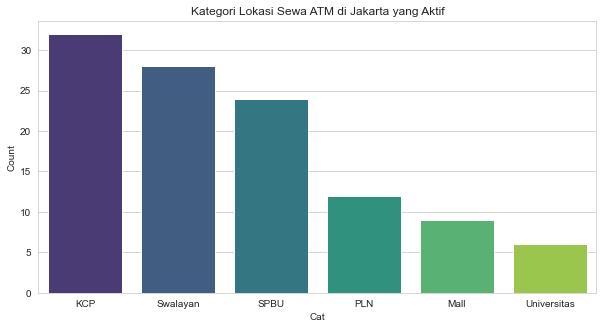

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Cat', y='Count', data=new_df_lokasi)
plt.title('Kategori Lokasi Sewa ATM di Jakarta yang Aktif')

In [39]:
data2 = pd.read_excel('../data-cleaned.xlsx', sheet_name='data_aktifitas', index_col=0)

In [40]:
df4 = data2['lokasi']
df4.head()

1    ruang uat dpti
2    pln ahmad yani
4      graha energy
6         bkp medan
7         bkp medan
Name: lokasi, dtype: object

In [61]:
df5 = df[['lokasi']][df['status']=='aktif']

In [62]:
lst_swalayan_da = []
lst_swalayan_sa = []
lst_swalayan_cat = ['toko', 'swalayan', 'tip top', 'carefour', 'indomaret', 'alfa mart', 'alfamart', 'giant', 'super indo']

for i in lst_swalayan_cat:
    for x in list(df4[df4.str.contains(i)]):
        lst_swalayan_da.append(x)
    for x in list(df5['lokasi'][df5['lokasi'].str.contains(i)]):
        lst_swalayan_sa.append(x)
        
len_swalayan_da = len(list(set(lst_swalayan_da)))
len_swalayan_sa = len(list(set(lst_swalayan_sa)))

In [79]:
new_df = pd.DataFrame(columns=('cat', 'count'))
cat_lst = ['count_sewaatm', 'count_dataakifitas']
len_lst = [len_swalayan_sa, len_swalayan_da]

In [80]:
new_df['cat'] = cat_lst
new_df['count'] = len_lst

In [81]:
new_df

,cat,count
0,count_sewaatm,177
1,count_dataakifitas,142


Text(0.5, 1.0, 'Perbedaan Jumlah ATM Swalayan yang Aktif pada `SEWAATM` dan `Data Aktifitas`')

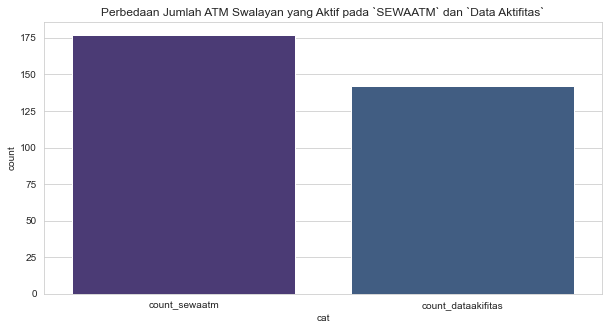

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(x='cat', y='count', data=new_df)
plt.title('Perbedaan Jumlah ATM Swalayan yang Aktif pada `SEWAATM` dan `Data Aktifitas`')